In [15]:
from keras.datasets import imdb
import numpy as np

In [2]:
# num_words=10000 mean keep the top 10,000 most frequently occuring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [28]:
# each review is a list of word indices. Because we set num_word=10000, no word index will exceeds 10,000
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
# decode data
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [6]:
reversed_word_index = dict([value, key] for (key, value) in word_index.items())

In [11]:
# The indices are offset by 3 because 0, 1, 2 are reserved indices for "padding", "start of sequence", and "unknown"
decoded_review = ' '.join(reversed_word_index.get(i - 3, '?') for i in train_data[0])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways to do that:
- “Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer).


- One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.


In [21]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [23]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [25]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [26]:
y_train[0]

1.0

In [33]:
from keras import models
from keras import layers


In [62]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [64]:
# from keras import losses
# from keras import optimizers
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
#               loss=losses.binary_crossentropy, 
#               metrics=[metrics.binary_accuracy])


In [65]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train= y_train[10000:]

In [72]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))
print(model.evaluate(x_test, y_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 152us/step - loss: 0.0044 - acc: 0.9989 - val_loss: 0.8553 - val_acc: 0.8628
Epoch 2/4
15000/15000 [==============================] - 2s 151us/step - loss: 5.1210e-04 - acc: 1.0000 - val_loss: 0.8725 - val_acc: 0.8628
Epoch 3/4
15000/15000 [==============================] - 2s 152us/step - loss: 4.0554e-04 - acc: 1.0000 - val_loss: 0.9060 - val_acc: 0.8615
Epoch 4/4
25000/25000 [==============================] - 3s 127us/step
[1.0169984003984929, 0.84731999999999996]


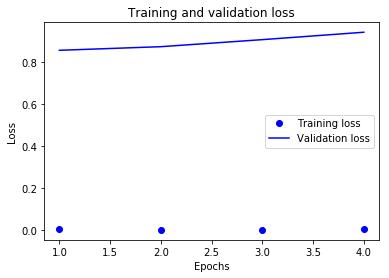

In [73]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

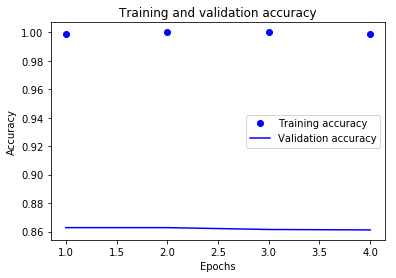

In [74]:
history_dict = history.history
history_dict.keys()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print